<a href="https://colab.research.google.com/github/joaoo-vittor/analise-microdados-enem-2019/blob/main/Insight_MicrodadosEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos Microdados do Enem 2019


## Sumário do Projeto

1. Introdução

  1.1. Objetivo

  1.2. O que é o Enem?

2. Definição do Problema de Negócio

  2.1 Objetivo do Projeto

3. Preparação dos Dados
  
  3.1. Obtendo os dados

  3.2. Documentação dos dados

  3.3. Imports

  3.4. Funções auxiliares

4. Análise Exploratória dos Dados

5. Conclusão

### 1. Introdução

#### 1.1. Objetivo

#### 1.2. O que é o Enem:

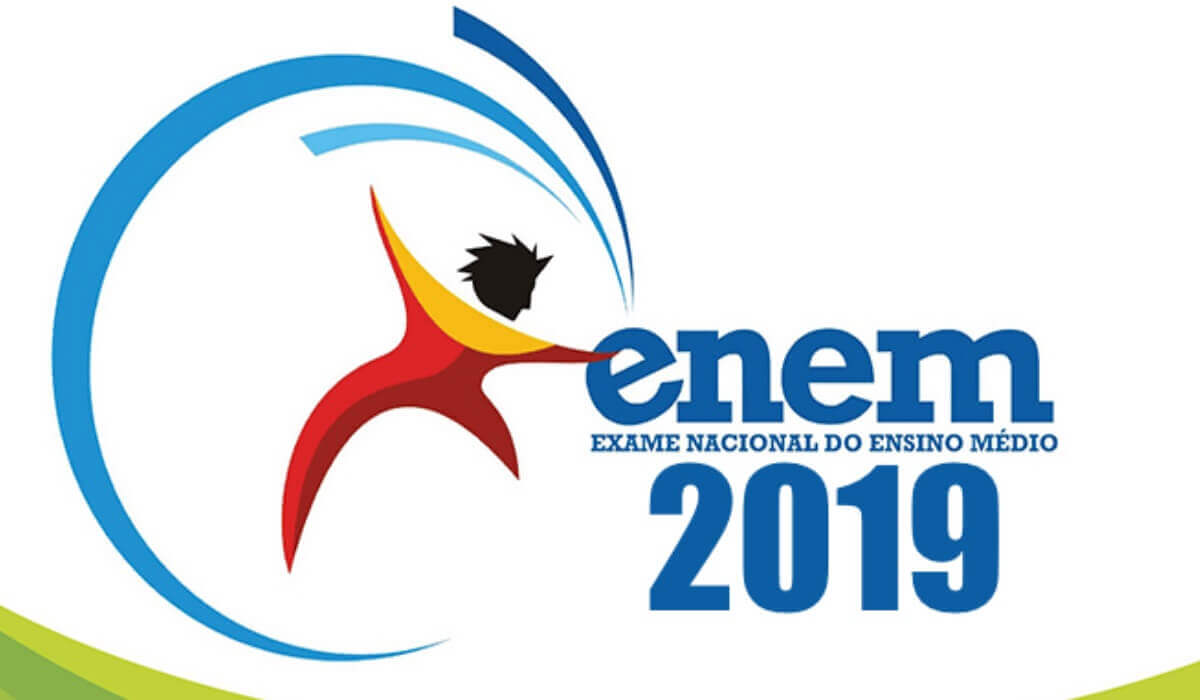

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. O exame aperfeiçoou sua metodologia e, em 2009, passou a ser utilizado como mecanismo de acesso à educação superior, por meio do Sistema de Seleção Unificada (Sisu), do Programa Universidade para Todos (ProUni) e de convênios com instituições portuguesas. Os participantes do Enem também podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem continuam possibilitando o desenvolvimento de estudos e indicadores educacionais.


### 2. Definição do Problema de Negócio

Neste projeto, utilizaremos os microdados do enem de 2019, com dados do participante, da escola, dos pedidos de atendimento especializado, dos pedidos de atendimento especifico, dos pedidos de atendimento especializado e especifico para a realização da prova, do local de aplicação da prova, da prova objetiva, da redação e do questionário socioeconomico.


#### 2.1 Objetivo do Projeto


Como objetivo do projeto, realizaremos algumas ánalises dos microdados do Enem 2019.

### 3. Preparação dos Dados

#### 3.1. Obtendo Dados:

Os microdados do Inep se constituem no menor nível de desagregação de dados recolhidos por suas pesquisas estatísticas, avaliações e exames. 

*Fonte:* [Inep](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados)

In [ ]:
# Link para download dos microdados
# https://download.inep.gov.br/microdados/microdados_enem_2019.zip

In [ ]:
# criando um diretório para guardar os dados
# !mkdir -p "/content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem"

In [ ]:
# fazendo a requisição dos dados
# !wget -P "/content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem" https://download.inep.gov.br/microdados/microdados_enem_2019.zip

In [ ]:
# Desconpactando os dados
# !unzip /content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem/microdados_enem_2019.zip -d /content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem

#### 3.2. Documentação dos dados

No link a baixo você encontrará o Dicionário dos dados trabalhados nesse projeto.

Link: [Dicionário Dados](https://drive.google.com/file/d/13h-ouF8I2P3D-9GplKvUq6dUJ7SJQSl7/view?usp=sharing)

#### 3.3. Imports:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Setando o style do seaborn
sns.set() 

In [ ]:
path_microdados = '/content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem/DADOS/MICRODADOS_ENEM_2019.csv'

In [ ]:
import chardet

with open(path_microdados, 'rb') as f:
  result = chardet.detect(f.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

#### 3.4. Funções auxiliares

In [ ]:
def read_data_counts(path, var, encod='ISO-8859-1', s=';', chuks=100000):
  arr = []
  for chk in pd.read_csv(path, encoding=encod, sep=s, chunksize=chuks):
    arr.append(chk[var].value_counts())
  return pd.concat(arr, ignore_index=False)

In [ ]:
def read_data_columns(path, columns=[], encod='ISO-8859-1', s=';', chuks=100000):
  arr = []
  for chk in pd.read_csv(path, encoding=encod, sep=s, chunksize=chuks, usecols=columns):
    arr.append(chk[columns])
  return pd.concat(arr, ignore_index=False)

### 4. Análise Exploratória dos Dados

#### 4.1. Lendo dados do **Participante**:

- **NU_IDADE** - Corresponde a Idade do paricipante

- **TP_ESCOLA** - Corresponde ao de	Tipo de escola do Ensino Médio do paricipante

- **TP_SEXO** - Corresponde ao Sexo do paricipante


In [ ]:
df_qtd_tipo_esc = read_data_columns(path_microdados, 
                                    columns=['NU_IDADE','TP_ESCOLA', 'TP_SEXO'])

In [ ]:
df_qtd_tipo_esc.head()

,NU_IDADE,TP_ESCOLA,TP_SEXO
0,21,1,M
1,16,1,F
2,18,3,F
3,23,2,M
4,23,1,M


#### 4.2. Qual a maior idade dos alunos:

In [ ]:
print(df_qtd_tipo_esc['NU_IDADE'].max(), 'anos')

94 anos


#### 4.3. Qual a menor idade dos alunos:

In [ ]:
print(df_qtd_tipo_esc['NU_IDADE'].min(), 'anos')

1 anos


OBS: *Esse(s) aluno(s) com idade tão baixa tem grande chance de ser erro na base de dados*

In [ ]:
df_qtd_tipo_esc['NU_IDADE'].value_counts()

18    864186
17    847303
19    577161
20    409385
16    316437
       ...  
91         2
92         1
87         1
88         1
94         1
Name: NU_IDADE, Length: 91, dtype: int64

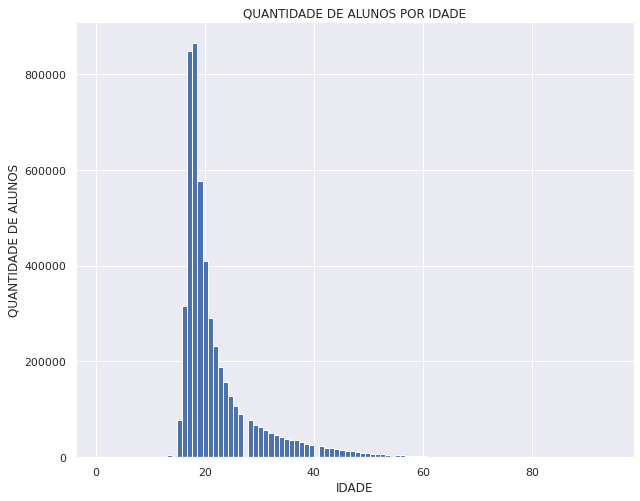

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
df_qtd_tipo_esc['NU_IDADE'].hist(bins=100)
plt.title('QUANTIDADE DE ALUNOS POR IDADE')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.show()

#### 4.4. Quantidade de alunos do sexo masculino:

In [ ]:
df_qtd_tipo_esc.head()

,NU_IDADE,TP_ESCOLA,TP_SEXO
0,21,1,M
1,16,1,F
2,18,3,F
3,23,2,M
4,23,1,M


In [ ]:
masc = df_qtd_tipo_esc[df_qtd_tipo_esc['TP_SEXO'] == 'M'].value_counts().sum()
print(f'Total de alunos o sexo masculino é {masc}')

Total de alunos o sexo masculino é 2063448


#### 4.5. Quantidade de alunos do sexo feminino:

In [ ]:
fem = df_qtd_tipo_esc[df_qtd_tipo_esc['TP_SEXO'] == 'F'].value_counts().sum()
print(f'Total de alunos o sexo feminino é {fem}')

Total de alunos o sexo feminino é 3031822


#### 4.6. Quantidade de alunos por sexo (Gráfico):

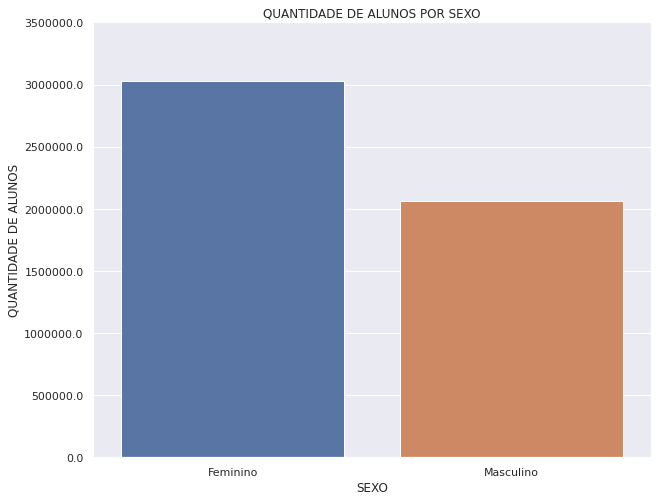

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
f = sns.barplot(x=['Feminino', 'Masculino'], y=[fem, masc])
plt.yticks(f.get_yticks(), f.get_yticks() * 1)
plt.title('QUANTIDADE DE ALUNOS POR SEXO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.xlabel('SEXO')
plt.show()

- Quantidade de alunos de escola pública:
  - 1 -	Não Respondeu

  - 2 -	Pública

  - 3 -	Privada

  - 4	- Exterior

In [ ]:
df_qtd_tipo_esc['TP_ESCOLA'].unique()

array([1, 3, 2])

In [ ]:
mask = df_qtd_tipo_esc['TP_ESCOLA'] == 1
df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Não Respondeu'

In [ ]:
mask = df_qtd_tipo_esc['TP_ESCOLA'] == 2
df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Pública'

In [ ]:
mask = df_qtd_tipo_esc['TP_ESCOLA'] == 3
df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Privada'

In [ ]:
df_qtd_tipo_esc['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Privada', 'Pública'], dtype=object)

In [ ]:
df_qtd_tipo_esc['TP_ESCOLA'].value_counts()

Não Respondeu    3629376
Pública          1247262
Privada           218632
Name: TP_ESCOLA, dtype: int64

In [ ]:
df_aux = pd.DataFrame(df_qtd_tipo_esc['TP_ESCOLA'].value_counts())

In [ ]:
df_aux.reset_index(inplace=True)

In [ ]:
df_aux

,index,TP_ESCOLA
0,Não Respondeu,3629376
1,Pública,1247262
2,Privada,218632


In [ ]:
df_aux.rename(columns={'TP_ESCOLA': 'QUANTIDADE', 'index': 'TP_ESCOLA'}, inplace=True)

#### 4.7. Quantidade de alunos por tipos de escola (Tabela):

In [ ]:
df_aux

,TP_ESCOLA,QUANTIDADE
0,Não Respondeu,3629376
1,Pública,1247262
2,Privada,218632


#### 4.8. Quantidade de alunos por tipos de escola (Gráfico):

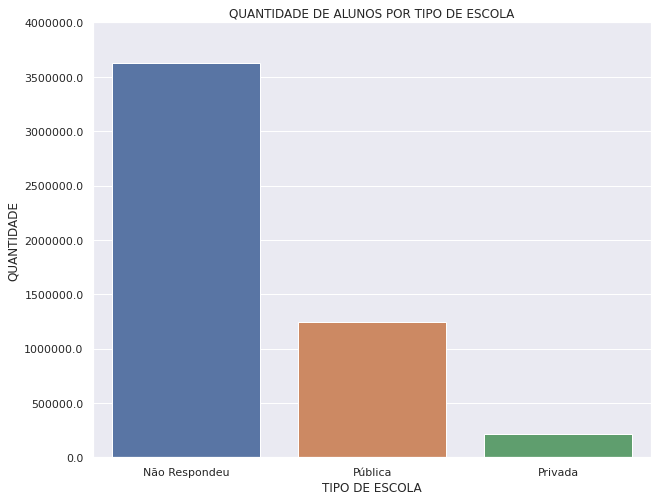

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
f = sns.barplot(data=df_aux, x='TP_ESCOLA', y='QUANTIDADE')
plt.yticks(f.get_yticks(), f.get_yticks() * 1)
plt.xlabel('TIPO DE ESCOLA')
plt.title('QUANTIDADE DE ALUNOS POR TIPO DE ESCOLA')
plt.show()

In [ ]:
df_qtd_tipo_esc.head()

,NU_IDADE,TP_ESCOLA,TP_SEXO
0,21,Não Respondeu,M
1,16,Não Respondeu,F
2,18,Privada,F
3,23,Pública,M
4,23,Não Respondeu,M


In [ ]:
df_aux_esc_s = pd.DataFrame(df_qtd_tipo_esc[['TP_ESCOLA', 'TP_SEXO']].value_counts())

In [ ]:
df_aux_esc_s.reset_index(inplace=True)

In [ ]:
df_aux_esc_s.rename(columns={0: 'Total'}, inplace=True)

#### 4.9. Quantidade de alunos por tipos de escola e sexo (Tabela):

In [ ]:
df_aux_esc_s

,TP_ESCOLA,TP_SEXO,Total
0,Não Respondeu,F,2176591
1,Não Respondeu,M,1452785
2,Pública,F,738298
3,Pública,M,508964
4,Privada,F,116933
5,Privada,M,101699


In [ ]:
mask_masc = df_aux_esc_s['TP_SEXO'] == 'M'

In [ ]:
mask_fem = df_aux_esc_s['TP_SEXO'] == 'F'

In [ ]:
df_aux_esc_s.loc[mask_masc, 'Total'].values

array([1452785,  508964,  101699])

In [ ]:
df_aux_esc_s.loc[mask_fem, 'Total'].values

array([2176591,  738298,  116933])

In [ ]:
df_aux_esc_s['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Pública', 'Privada'], dtype=object)

####  4.10. Quantidade de alunos por tipos de escola e sexo (Gráfico):

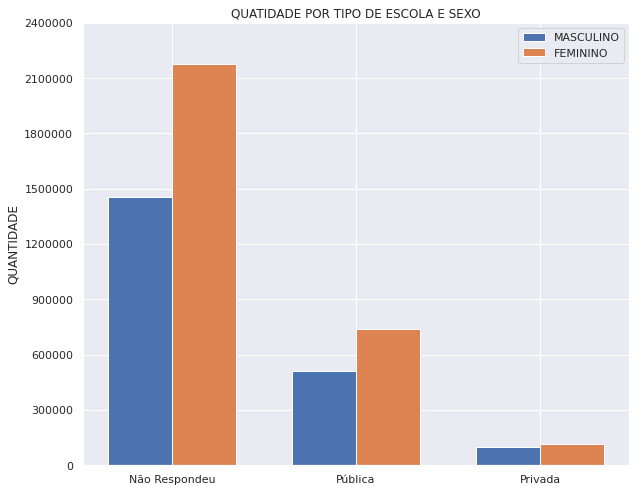

In [ ]:
x = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(9,7))
ax.bar(x - width/2, df_aux_esc_s.loc[mask_masc, 'Total'].values, width, label='MASCULINO')
ax.bar(x + width/2, df_aux_esc_s.loc[mask_fem, 'Total'].values, width, label='FEMININO')

ax.set_ylabel('QUANTIDADE')
ax.set_title('QUATIDADE POR TIPO DE ESCOLA E SEXO')
ax.set_xticks(x)
ax.set_xticklabels(df_aux_esc_s['TP_ESCOLA'].unique())
ax.set_yticks(np.arange(0, 2700000, 300000))
plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
ax.legend()

fig.tight_layout()
plt.show()

#### 4.11. Lendo mais dados do **Participante**:

- **SG_UF_RESIDENCIA** - Corresponde a Sigla da Unidade da Federação de residência
		
- **TP_COR_RACA** - Corresponde ao Cor/raça

- **TP_NACIONALIDADE** - Corresponde a Nacionalidade

- **TP_ST_CONCLUSAO** - Corresponde a	Situação de conclusão do Ensino Médio
		
- **TP_ANO_CONCLUIU**	- Corresponde a Ano de Conclusão do Ensino Médio

- **TP_ENSINO**  - Corresponde ao Tipo de instituição que concluiu ou concluirá o Ensino Médio 
	
- **IN_TREINEIRO** - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos

In [ ]:
cols = ['SG_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_NACIONALIDADE',
        'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
        'IN_TREINEIRO']

tp_cor_raca = ['Não declarado', 'Branca', 'Preta',
               'Parda', 'Amarela', 'Indígena']

tp_nacionalidade = ['Não informado', 'Brasileiro(a)', 'Brasileiro(a) Naturalizado(a)',
                    'Estrangeiro(a)', 'Brasileiro(a) Nato(a), nascido(a) no exterior']

tp_st_conclusao = ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2019',
                   'Estou cursando e concluirei o Ensino Médio após 2019',
                   'Não concluí e não estou cursando o Ensino Médio']

tp_ano_concluiu = ['Não informado', '2018', '2017', '2016', '2015', '2014', 
                   '2013', '2012', '2011', '2010', '2009', '2008', 
                   '2007', 'Antes de 2007']

In [ ]:
df_dados_alunos = read_data_columns(path_microdados, columns=cols)

In [ ]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,3,4,1,3,NaN,0
1,PA,3,1,3,0,NaN,1
2,PA,1,1,2,0,1.0,0
3,PA,3,1,2,0,1.0,0
4,PA,3,1,1,5,1.0,0


In [ ]:
df_dados_alunos['TP_ENSINO'].unique()

array([nan,  1.,  2.])

In [ ]:
df_dados_alunos['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [ ]:
df_dados_alunos['TP_COR_RACA'].unique()

array([3, 1, 2, 0, 4, 5])

In [ ]:
ser_cor_raca = df_dados_alunos['TP_COR_RACA'].value_counts().sort_index()

In [ ]:
ser_cor_raca.index = tp_cor_raca

#### 4.12. Quantidade de alunos por cor/raça:

In [ ]:
ser_cor_raca

Não declarado     103201
Branca           1831779
Preta             648309
Parda            2364063
Amarela           116162
Indígena           31756
Name: TP_COR_RACA, dtype: int64

In [ ]:
def plot_series(sereis=pd.Series(), title='', yl='', 
                xl='', escala=[], fsize=(8,6), p_kind='bar', g_rot=90):
  f, ax = plt.subplots(figsize=fsize)
  sereis.plot(kind=p_kind)
  ax.set_yticks(escala)
  plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
  plt.title(title)
  plt.ylabel(yl)
  plt.xlabel(xl)
  plt.xticks(rotation=g_rot)
  plt.show()

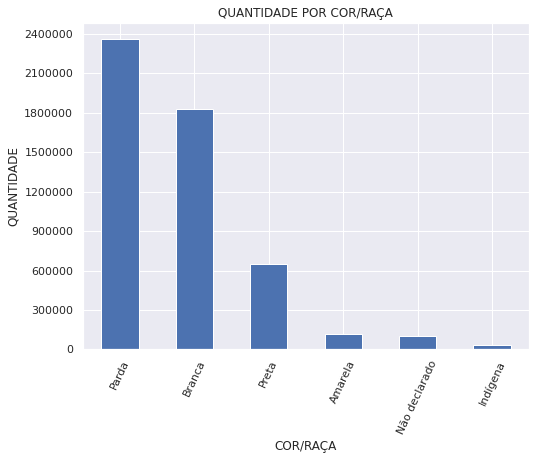

In [ ]:
plot_series(ser_cor_raca.sort_values(ascending=False),
            'QUANTIDADE POR COR/RAÇA',
            'QUANTIDADE',
            'COR/RAÇA',
            np.arange(0, 2700000, 300000), g_rot=65)

#### 4.13. Quantidade de alunos por estado:

In [ ]:
qtd_estado = df_dados_alunos['SG_UF_RESIDENCIA'].value_counts()
qtd_estado

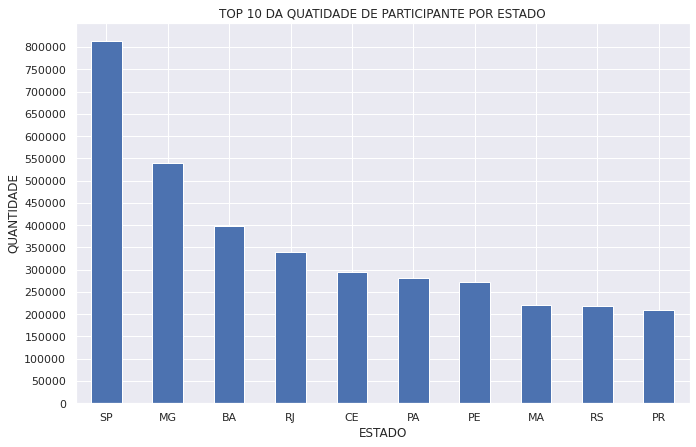

In [ ]:
plot_series(qtd_estado[:10], 'TOP 10 DA QUATIDADE DE PARTICIPANTE POR ESTADO',
            'QUANTIDADE', 'ESTADO', 
            np.arange(0, 850000, 50000), fsize=(11, 7), g_rot=0)

In [ ]:
# df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Privada'
for i, val in enumerate(tp_cor_raca):
  mask = df_dados_alunos['TP_COR_RACA'] == i
  df_dados_alunos.loc[mask, 'TP_COR_RACA'] = val

In [ ]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


In [ ]:
df_dados_alunos[['TP_COR_RACA','SG_UF_RESIDENCIA']].head()

,TP_COR_RACA,SG_UF_RESIDENCIA
0,Parda,PA
1,Parda,PA
2,Branca,PA
3,Parda,PA
4,Parda,PA


In [ ]:
np.nan in df_dados_alunos['TP_COR_RACA']

False

In [ ]:
df_dados_alunos['TP_COR_RACA'].value_counts()

Parda            2364063
Branca           1831779
Preta             648309
Amarela           116162
Não declarado     103201
Indígena           31756
Name: TP_COR_RACA, dtype: int64

In [ ]:
df_uf_cor = pd.DataFrame(df_dados_alunos.groupby(by='SG_UF_RESIDENCIA')['TP_COR_RACA'].value_counts())

In [ ]:
df_uf_cor.rename(columns={'TP_COR_RACA': 'QUANTIDADE'}, inplace=True)

In [ ]:
df_dados_alunos['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [ ]:
df_uf_cor.reset_index(inplace=True)

In [ ]:
df_uf_cor[['SG_UF_RESIDENCIA', 'TP_COR_RACA', 'QUANTIDADE']].loc[:5]

,SG_UF_RESIDENCIA,TP_COR_RACA,QUANTIDADE
0,AC,Parda,25941
1,AC,Branca,5811
2,AC,Preta,4246
3,AC,Amarela,1235
4,AC,Não declarado,697
5,AC,Indígena,299


#### 4.14. Quantidade de alunos por tipo de cor/raça (Tabela):

In [ ]:
df_AC_cor = df_uf_cor.query('SG_UF_RESIDENCIA == "AC"')[['TP_COR_RACA', 'QUANTIDADE']]

In [ ]:
df_AC_cor

,TP_COR_RACA,QUANTIDADE
0,Parda,25941
1,Branca,5811
2,Preta,4246
3,Amarela,1235
4,Não declarado,697
5,Indígena,299


#### 4.15. Quantidade de alunos por tipo de cor/raça (Gráfico):

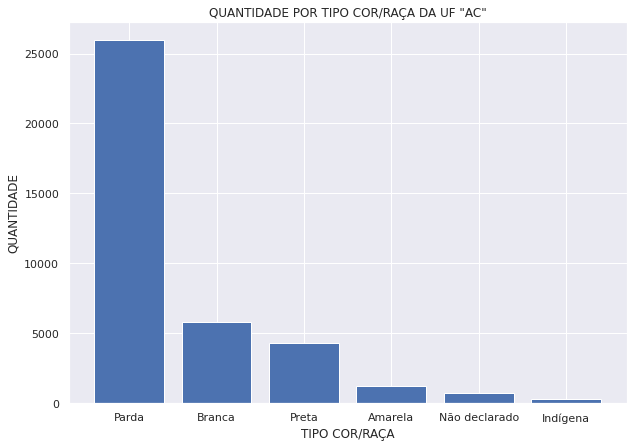

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x=df_AC_cor['TP_COR_RACA'], height=df_AC_cor['QUANTIDADE'], width=0.8)
plt.title('QUANTIDADE POR TIPO COR/RAÇA DA UF "AC"')
plt.ylabel('QUANTIDADE')
plt.xlabel('TIPO COR/RAÇA')
plt.show()

#### 4.16. Quantidade de alunos por tipo de cor/raça (Tabele):

  - Passo 1
    - Execute a célula abaixo.
  - Passo 2
    - Digite a UF do estado que deseja ver os dados

In [ ]:
print(df_uf_cor['SG_UF_RESIDENCIA'].unique())
uf = str(input('Digite a sigla do estados desejado: ')).upper()
print(f'\n\tTABELA DO ESTADO {uf}\n')
df_uf_cor.query(f'SG_UF_RESIDENCIA == "{uf}"')[['TP_COR_RACA', 'QUANTIDADE']]

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
Digite a sigla do estados desejado: pb

	TABELA DO ESTADO PB



,TP_COR_RACA,QUANTIDADE
84,Parda,83078
85,Branca,41693
86,Preta,13973
87,Amarela,4637
88,Não declarado,2897
89,Indígena,1502


#### 4.17. Quantidade de alunos por tipo de cor/raça (Gráfico):

  - Passo 1
    - Execute a célula abaixo.
  - Passo 2
    - Digite a UF do estado que deseja ver o gráfico com os dados

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
Digite a sigla do estados desejado: pb




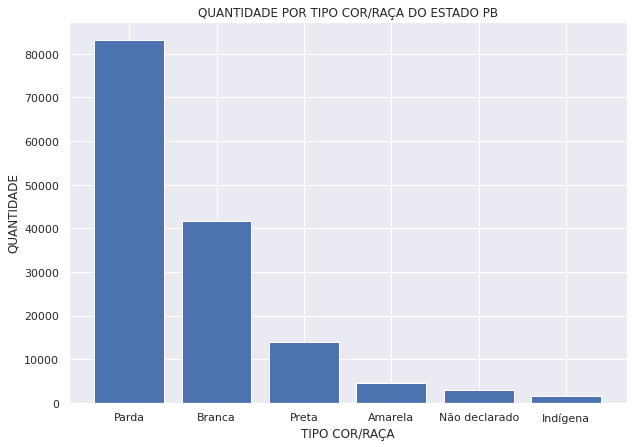

In [ ]:
print(df_uf_cor['SG_UF_RESIDENCIA'].unique())
uf = str(input('Digite a sigla do estados desejado: ')).upper()

df_aux = df_uf_cor.query(f'SG_UF_RESIDENCIA == "{uf}"')[['TP_COR_RACA', 'QUANTIDADE']]
print('\n')
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x=df_aux['TP_COR_RACA'], height=df_aux['QUANTIDADE'], width=0.8)
plt.title(f'QUANTIDADE POR TIPO COR/RAÇA DO ESTADO {uf}')
plt.ylabel('QUANTIDADE')
plt.xlabel('TIPO COR/RAÇA')
plt.show()

In [ ]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


In [ ]:
df_dados_alunos['TP_NACIONALIDADE'].unique()

array([4, 1, 2, 0, 3])

In [ ]:
df_nacion = df_dados_alunos['TP_NACIONALIDADE'].value_counts().sort_index()

In [ ]:
df_nacion.index = tp_nacionalidade

In [ ]:
df_nacion = pd.DataFrame(df_nacion)
df_nacion.rename(columns={'TP_NACIONALIDADE': 'QUANTIDADE'}, inplace=True)

In [ ]:
df_nacion.sort_values(by='QUANTIDADE', ascending=False, inplace=True)

#### 4.18. Quantidade de alunos por nacionalidade (Tabela):

In [ ]:
df_nacion

,QUANTIDADE
Brasileiro(a),4950021
Brasileiro(a) Naturalizado(a),124332
"Brasileiro(a) Nato(a), nascido(a) no exterior",8233
Não informado,6749
Estrangeiro(a),5935


In [ ]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


In [ ]:
df_dados_alunos['TP_ST_CONCLUSAO'].unique()

array([1, 3, 2, 4])

#### 4.19. Situação de conclusão do Ensino Médio (Tabela):

In [ ]:
df_st_conc = pd.DataFrame(df_dados_alunos['TP_ST_CONCLUSAO'].value_counts())
df_st_conc.index = tp_st_conclusao
df_st_conc.rename(columns={'TP_ST_CONCLUSAO': 'QUANTIDADE'}, inplace=True)
df_st_conc

,QUANTIDADE
Já concluí o Ensino Médio,2992921
Estou cursando e concluirei o Ensino Médio em 2019,1465895
Estou cursando e concluirei o Ensino Médio após 2019,616668
Não concluí e não estou cursando o Ensino Médio,19786


#### 4.20. Ano de Conclusão do Ensino Médio (Tabela):

In [ ]:
df_ano_concl = pd.DataFrame(df_dados_alunos['TP_ANO_CONCLUIU'].value_counts().sort_index())

In [ ]:
df_ano_concl.index = tp_ano_concluiu
df_ano_concl.rename(columns={'TP_ANO_CONCLUIU': 'QUANTIDADE'}, inplace=True)

In [ ]:
df_ano_concl

,QUANTIDADE
Não informado,2203392
2018,660960
2017,447324
2016,307227
2015,232860
2014,182887
2013,144797
2012,123774
2011,97015
2010,88481


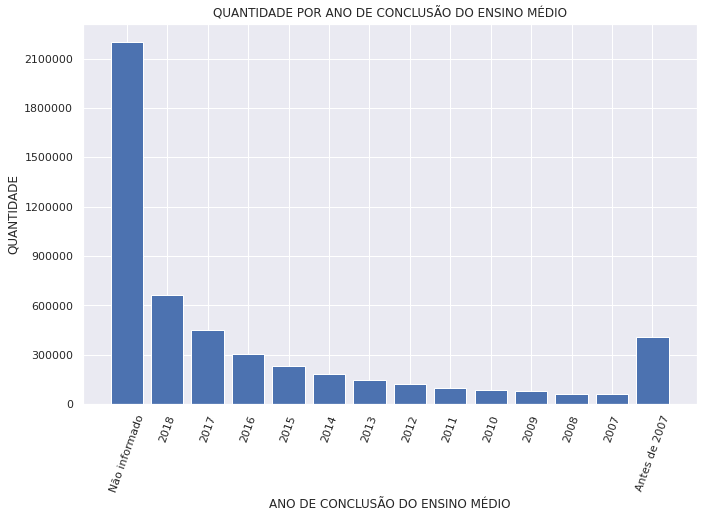

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))
ax.bar(x=df_ano_concl.index, height=df_ano_concl['QUANTIDADE'])
plt.xticks(rotation=70)
ax.set_yticks(np.arange(0, 2300000, 300000))
plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
plt.title('QUANTIDADE POR ANO DE CONCLUSÃO DO ENSINO MÉDIO')
plt.ylabel('QUANTIDADE')
plt.xlabel('ANO DE CONCLUSÃO DO ENSINO MÉDIO')
plt.show()

In [ ]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


- Os valores **NaN** da coluna **TP_ENSINO** estou tratando eles como *TIPO DE ENSINO* não informado pelo participante.

In [ ]:
df_dados_alunos['TP_ENSINO'].loc[df_dados_alunos['TP_ENSINO'].isna()] = 0

In [ ]:
tp_ensino = ['Não Informou', 
             'Ensino Regular', 
             'Educação Especial - Modalidade Substitutiva']

In [ ]:
df_ensino = pd.DataFrame(df_dados_alunos['TP_ENSINO'].value_counts().sort_index())
df_ensino.rename(columns={'TP_ENSINO': 'QUANTIDADE'}, inplace=True)

#### 4.21. Tipo de instituição que concluiu ou concluirá o Ensino Médio (Tabela):

In [ ]:
df_ensino.index = tp_ensino
df_ensino

,QUANTIDADE
Não Informou,2217073
Ensino Regular,2864398
Educação Especial - Modalidade Substitutiva,13799


#### 4.22. Quantidade de participantes que fizeram a prova com intuito de apenas treinar seus conhecimentos:

In [ ]:
df_treino = pd.DataFrame(df_dados_alunos['IN_TREINEIRO'].value_counts())
df_treino.rename(columns={'IN_TREINEIRO': 'QUANTIDADE'}, inplace=True)
df_treino.index = ['Não', 'Sim']
df_treino

,QUANTIDADE
Não,4478602
Sim,616668


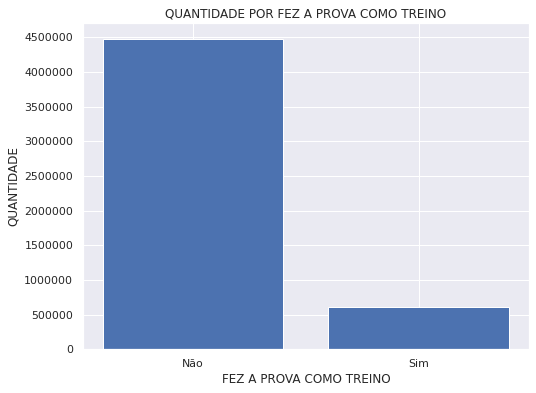

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=df_treino.index, height=df_treino['QUANTIDADE'])
ax.set_yticks(np.arange(0, 4800000, 500000))
plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
plt.title('QUANTIDADE POR FEZ A PROVA COMO TREINO')
plt.ylabel('QUANTIDADE')
plt.xlabel('FEZ A PROVA COMO TREINO')
plt.show()

### 8. Conclusão